In [1]:
import os
import sys
import importlib

script_dir = '/mnt/c/Users/kevin/OneDrive/2-code/1-Research_projects/1-project-categorical-MMN/notebooks'
src_dir = os.path.join(script_dir, '..', 'src')
sys.path.append(src_dir)
import parameters as params
import classes as cl

import matplotlib.pyplot as plt
import plotly.express as px

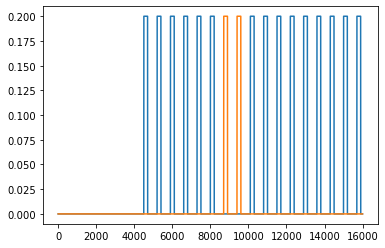

In [2]:
params.PARAMS_Stimulus['nbr_rep_dev'] = 2
params.PARAMS_Integrator['tau'] = 0.4


params.PARAMS_PC['gA'] = -0.001
params.PARAMS_SST['gA'] = -0.001
params.PARAMS_Synapses_Integrator['wmax'] = 2.0*0.15/20


stim = cl.Stimulus(params.PARAMS_Stimulus, params.PARAMS_Simulation, params.PARAMS_PC['Ncells'])

plt.plot(stim.stimulus[20,:])
plt.plot(stim.stimulus[88,:])

In [3]:
my_network = cl.Network(params.PARAMS_Integrator, params.PARAMS_Synapses_Integrator, params.PARAMS_PC, params.PARAMS_PV, params.PARAMS_SST, params.PARAMS_VIP, params.PARAMS_NDF, params.PARAMS_Simulation, params.PARAMS_Stimulus)
my_network.full_dynamics(stim.stimulus)



Text(0, 0.5, 'firing rate')

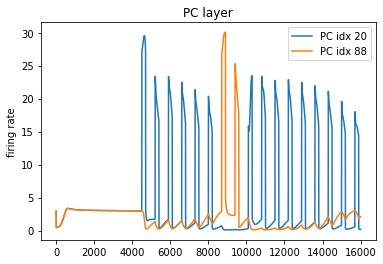

In [4]:
plt.plot(my_network.save_pc_layer[20,:], label = 'PC idx 20')
plt.plot(my_network.save_pc_layer[88,:], label = 'PC idx 88')
plt.title('PC layer')
plt.legend()
plt.ylabel('firing rate')


In [5]:
import pandas as pd
import numpy as np
time = np.arange(0,(len(stim.stimulus[20,:]-1)*params.PARAMS_Simulation['dt']),params.PARAMS_Simulation['dt'])
df = pd.DataFrame({ 'PC_20' :my_network.save_pc_layer[20,:], 'PC_88':my_network.save_pc_layer[88,:], 't': time})

In [6]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'][4000:], y=df['PC_20'][4000:], mode='lines', name='Pyramidal cell standard'))
fig.add_trace(go.Scatter(x=df['t'][4000:], y=df['PC_88'][4000:], mode='lines', name='Pyramidal cell deviant'))
fig.update_layout(template = "presentation", xaxis_title='Time (s)', yaxis_title='Firing rate (Hz)')
fig.show()

In [9]:
df = pd.DataFrame({ 'Int_20' :my_network.save_integrator_layer[20,:], 'Int_88':my_network.save_integrator_layer[88,:], 't': time})
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['t'][4000:], y=df['Int_20'][4000:], mode='lines', name='Integrator cell standard'))
fig.add_trace(go.Scatter(x=df['t'][4000:], y=df['Int_88'][4000:], mode='lines', name='Integrator cell deviant'))
fig.update_layout(template = "presentation", xaxis_title='Time (s)', yaxis_title='Firing rate (Hz)')
fig.show()

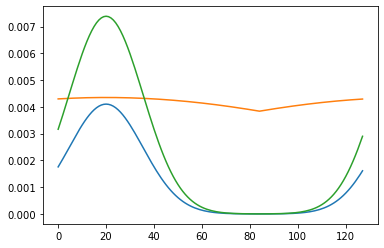

In [15]:
plt.plot(my_network.W_pc_to_pc[20,:])
plt.plot(my_network.W_pc_to_sst[20,:])
plt.plot(my_network.W_pc_to_pv[20,:])


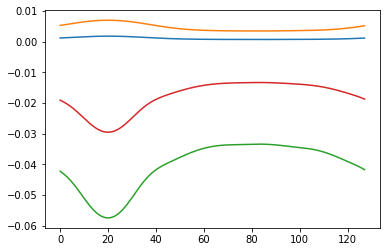

In [19]:
plt.plot(my_network.W_integrator_to_ndf[88,:])
plt.plot(my_network.W_integrator_to_ndf[20,:])
plt.plot(my_network.W_ndf_to_dend[20,:])
plt.plot(my_network.W_ndf_to_dend[88,:])

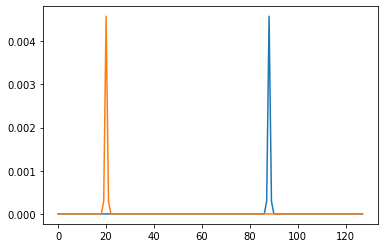

In [21]:
my_network2 = cl.Network(params.PARAMS_Integrator, params.PARAMS_Synapses_Integrator, params.PARAMS_PC, params.PARAMS_PV, params.PARAMS_SST, params.PARAMS_VIP, params.PARAMS_NDF, params.PARAMS_Simulation, params.PARAMS_Stimulus)
plt.plot(my_network2.W_integrator_to_ndf[88,:])
plt.plot(my_network2.W_integrator_to_ndf[20,:])
# plt.plot(my_network2.W_ndf_to_dend[20,:])
# plt.plot(my_network2.W_ndf_to_dend[88,:])


Text(0.5, 0, 'time')

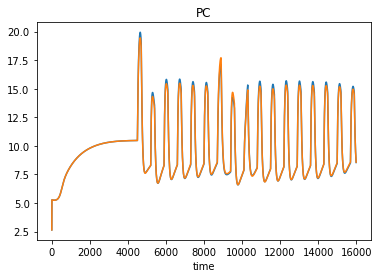

In [7]:
plt.plot(my_network.save_sst_layer[20,:])
plt.plot(my_network.save_sst_layer[88,:])
plt.title('PC')
plt.xlabel('time')

In [29]:

params.PARAMS_PC['gA'] = -0.005
params.PARAMS_SST['gA'] = -0.005


my_network2 = cl.Network(params.PARAMS_Integrator, params.PARAMS_Synapses_Integrator, params.PARAMS_PC, params.PARAMS_PV, params.PARAMS_SST, params.PARAMS_VIP, params.PARAMS_NDF, params.PARAMS_Simulation, params.PARAMS_Stimulus)
my_network2.full_dynamics(stim.stimulus)


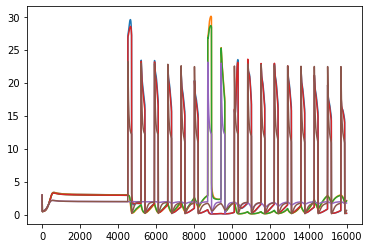

In [30]:
plt.plot(my_network.save_pc_layer[20,:])
plt.plot(my_network.save_pc_layer[88,:])
plt.plot(my_network2.save_pc_layer[88,:])
plt.plot(my_network2.save_pc_layer[20,:])
plt.plot(my_network3.save_pc_layer[88,:])
plt.plot(my_network3.save_pc_layer[20,:])

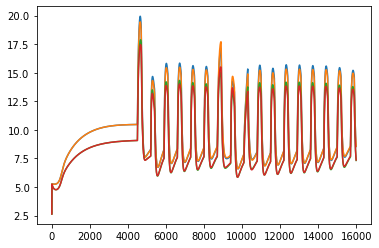

In [15]:
plt.plot(my_network.save_sst_layer[20,:])
plt.plot(my_network.save_sst_layer[88,:])
plt.plot(my_network2.save_sst_layer[20,:])
plt.plot(my_network2.save_sst_layer[88,:])

## Analysis of the temporal MMN effect

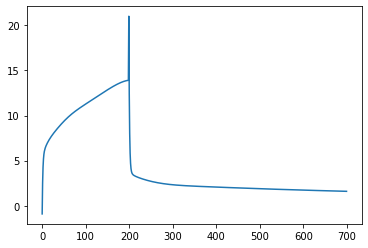

In [31]:
plt.plot(my_network2.save_pc_layer[88,int((params.PARAMS_Stimulus['Tresting']+ 6*(params.PARAMS_Stimulus['Tinter'] + params.PARAMS_Stimulus['Tstim']) + params.PARAMS_Stimulus['Tinter'])/params.PARAMS_Simulation['dt']):int((params.PARAMS_Stimulus['Tresting']+ 7*(params.PARAMS_Stimulus['Tinter'] + params.PARAMS_Stimulus['Tstim']) + params.PARAMS_Stimulus['Tinter'])/params.PARAMS_Simulation['dt'])+1] - my_network2.save_pc_layer[20,int((params.PARAMS_Stimulus['Tresting']+ 5*(params.PARAMS_Stimulus['Tinter'] + params.PARAMS_Stimulus['Tstim']) + params.PARAMS_Stimulus['Tinter'])/params.PARAMS_Simulation['dt'])+1:int((params.PARAMS_Stimulus['Tresting']+ 6*(params.PARAMS_Stimulus['Tinter'] + params.PARAMS_Stimulus['Tstim']) + params.PARAMS_Stimulus['Tinter'])/params.PARAMS_Simulation['dt'])+1])